In [37]:
# # E-commerce MySQL Analysis Notebook (via mysql-connector)

# %%
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
import numpy as np

In [43]:
# Connect to DB
db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='@@tish12M',
    database='ecommerce_db'
    )
cur = db.cursor()
cur = db.cursor(buffered=True)

In [39]:
# List of tables
tables = ["customers", "sellers", "orders", "order_items", "payments", "products", "geolocation"]

# Fetch first 5 rows from each table
for table in tables:
    cur.execute(f"SELECT * FROM {table} LIMIT 5;")
    data = cur.fetchall()
    # Get column names
    columns = [desc[0] for desc in cur.description]
    df = pd.DataFrame(data, columns=columns)
    print(f"--- {table} ---")
    display(df)
    print("\n")

# Close connection
cur.close()
db.close()

--- customers ---


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP
1,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
2,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES
3,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
4,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP




--- sellers ---


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,9080,santo andre,SP
1,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES
2,001e6ad469a905060d959994f1b41e4f,24754,sao goncalo,RJ
3,002100f778ceb8431b7a1020ff7ab48f,14405,franca,SP
4,003554e2dce176b5555353e4f3555ac8,74565,goiania,GO




--- orders ---


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17




--- order_items ---


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14




--- payments ---


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,credit_card,2,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,credit_card,3,259.83
2,000229ec398224ef6ca0657da4fc703e,1,credit_card,5,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,credit_card,2,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,credit_card,3,218.04




--- products ---


,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,perfumery,53,596,6,300,20,16,16
1,00088930e925c41fd95ebfe695fd2655,automotive,56,752,4,1225,55,10,26
2,0009406fd7479715e4bef61dd91f2462,bed table bath,50,266,2,300,45,15,35
3,000b8f95fcb9e0096488278317764d19,housewares,25,364,3,550,19,24,12
4,000d9be29b5207b54e86aa1b1ac54872,Watches present,48,613,4,250,22,11,15




--- geolocation ---


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [45]:
query= """ select distinct customer_city,count(*) from customers 
group by customer_city"""

cur.execute(query)

data=cur.fetchall()

df = pd.DataFrame(data)
df.head()

,0,1
0,osasco,746
1,itapecerica,13
2,nova venecia,19
3,mendonca,5
4,sao paulo,15540


In [46]:
query= """ select count(order_id) from orders where year(order_purchase_timestamp) = 2017 """

cur.execute(query)

data=cur.fetchall()

print(data)

"total order placed in 2017 are", data[0][0]

[(45101,)]


('total order placed in 2017 are', 45101)

In [48]:
query= """ select upper(products.product_category_name) category, round(sum(payments.payment_value), 2) sales from products join order_items on 
products.product_id = order_items.product_id join payments on payments.order_id = order_items.order_id group by category"""

cur.execute(query)

data=cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "Sales"])
df

,Category,Sales
0,COOL STUFF,779698.00
1,PET SHOP,311268.97
2,FURNITURE DECORATION,1430176.39
3,PERFUMERY,506738.66
4,GARDEN TOOLS,838280.75
...,...,...
69,FASHION SPORT,3645.92
70,LA CUISINE,2913.53
71,PC GAMER,2174.43
72,INSURANCE AND SERVICES,324.51


In [49]:
query= """ select (sum(case when payment_installments >= 1 then 1 else 0 end))/count(*)*100 from payments """

cur.execute(query)

data=cur.fetchall()
"the percentage of orders that were paid in installments is", data[0][0]

('the percentage of orders that were paid in installments is',
 Decimal('99.9981'))

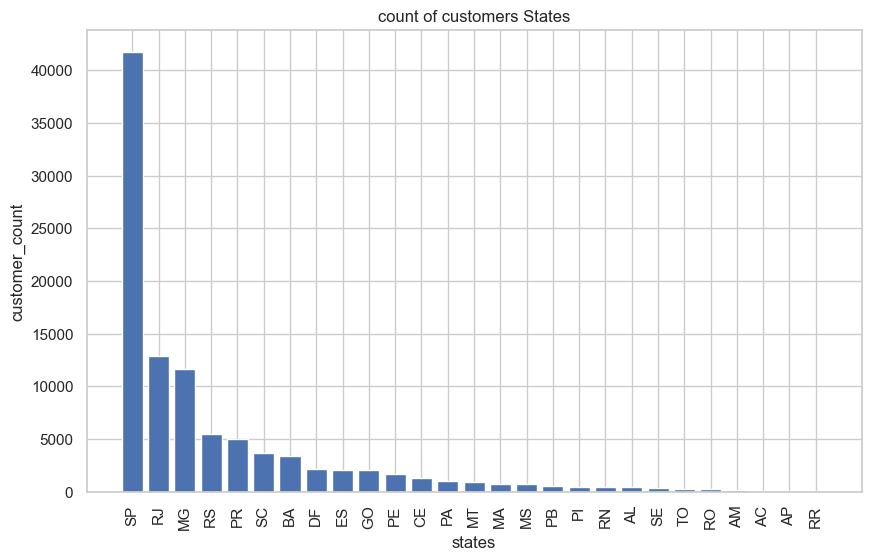

In [51]:
query= """ select customer_state, count(customer_id) from customers group by customer_state """

cur.execute(query)

data=cur.fetchall()
df = pd.DataFrame(data, columns = ["state", "customer_count"])
df = df.sort_values(by = "customer_count", ascending = False)
plt.figure(figsize = (10,6))
plt.bar(df["state"], df["customer_count"])
plt.xticks(rotation = 90)
plt.xlabel("states")
plt.ylabel("customer_count")
plt.title("count of customers States")
plt.show()

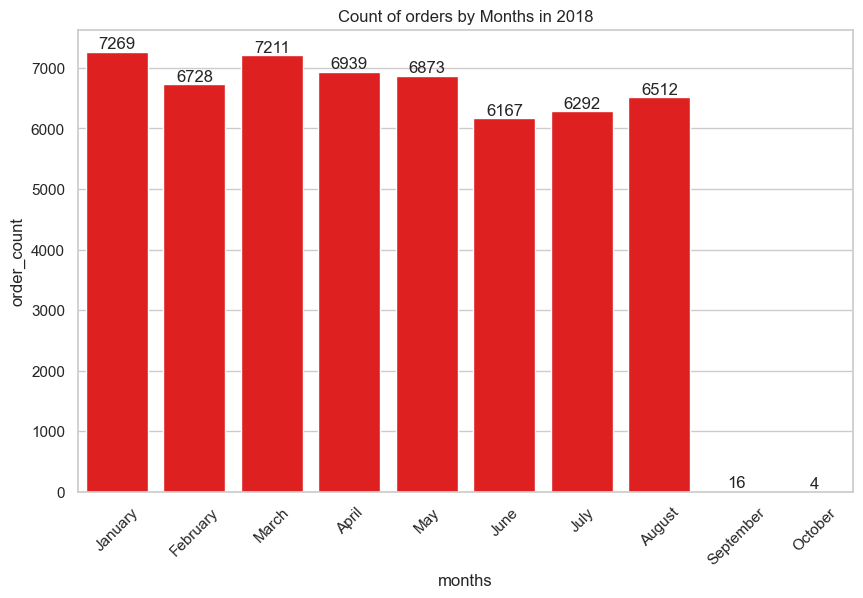

In [52]:
query= """ select monthname(order_purchase_timestamp) months, count(order_id) order_count from orders where year( order_purchase_timestamp) = 2018 group
by months"""

cur.execute(query)

data=cur.fetchall() 
df = pd.DataFrame(data, columns = ["months", "order_count"])
o = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October"]
ax = sns.barplot(x = df["months"], y = df["order_count"], data = df, order = o, color = "red")
plt.xticks(rotation = 45)
ax.bar_label(ax.containers[0])
plt.title("Count of orders by Months in 2018")
plt.show()

In [53]:
query= """ with count_per_order as
(select orders.order_id, orders.customer_id, count(order_items.order_id) as OC from orders join order_items on orders.order_id = order_items.order_id 
group by orders.order_id, orders.customer_id)

select customers.customer_city, round(avg(count_per_order.oc),2) average_orders from customers join count_per_order on customers.customer_id = count_per_order.customer_id 
group by customers.customer_city order by average_orders desc; """

cur.execute(query)

data=cur.fetchall()

df = pd.DataFrame(data, columns = ["customer city", "average products per orders"])
df.head(10)

,customer city,average products per orders
0,padre carvalho,7.00
1,celso ramos,6.50
2,datas,6.00
3,candido godoi,6.00
4,matias olimpio,5.00
5,morro de sao paulo,4.00
6,teixeira soares,4.00
7,cidelandia,4.00
8,curralinho,4.00
9,picarra,4.00


In [55]:
query= """ select upper(products.product_category_name) category, round((sum(payments.payment_value)/(select sum(payment_value) from payments))*100,2) 
sales_percentage from products join order_items on products.product_id = order_items.product_id join payments on 
payments.order_id = order_items.order_id group by category order by sales_percentage desc; """

cur.execute(query)

data=cur.fetchall()

df = pd.DataFrame(data, columns = ["Category", "percentage distribution"])
df.head()

,Category,percentage distribution
0,BED TABLE BATH,10.70
1,HEALTH BEAUTY,10.35
2,COMPUTER ACCESSORIES,9.90
3,FURNITURE DECORATION,8.93
4,WATCHES PRESENT,8.93


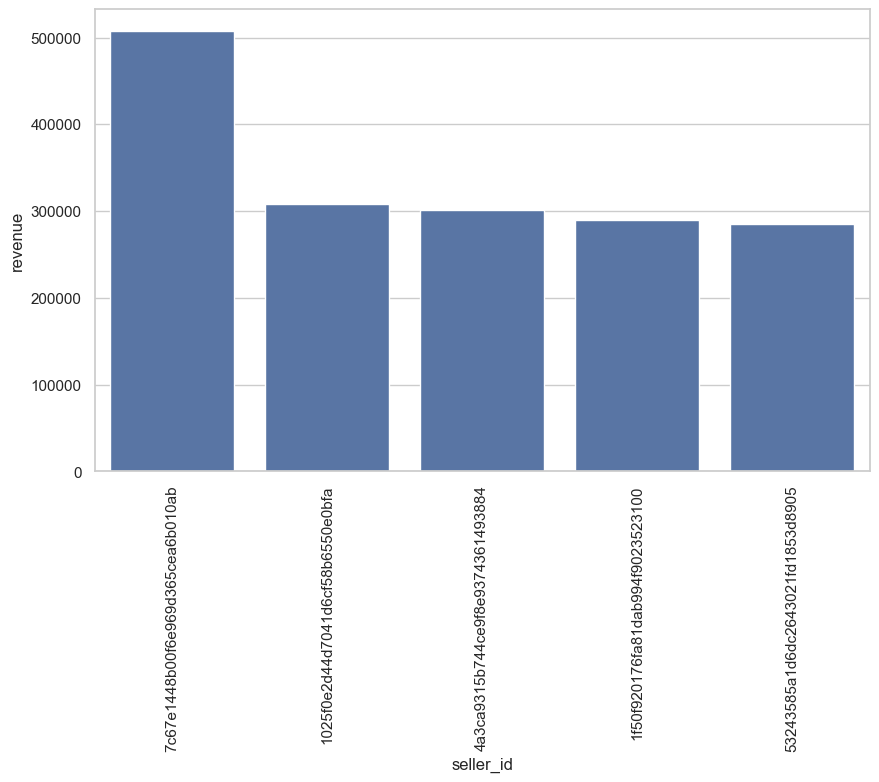

In [60]:
query= """ select *, dense_rank() over(order by revenue desc) as rn from(select order_items.seller_id, sum(payments.payment_value) revenue from 
order_items join payments on order_items.order_id = payments.order_id group by order_items.seller_id) as a"""

cur.execute(query)

data=cur.fetchall()
df = pd.DataFrame(data, columns = ["seller_id", "revenue", "rank"])
df=df.head()
sns.barplot(x = "seller_id", y = "revenue", data = df)
plt.xticks(rotation = 90)
plt.show()

In [61]:
query= """ select customer_id, order_purchase_timestamp, payment, avg(payment) over(partition by customer_id order by order_purchase_timestamp rows between 2 preceding and current row)
as mov_avg from (select orders.customer_id, orders.order_purchase_timestamp, payments.payment_value as payment from payments join orders on payments.order_id = orders.order_id)
as a;"""

cur.execute(query)

data=cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,114.74,114.740000
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,67.41,67.410000
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,195.42,195.420000
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,179.35,179.350000
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,107.01,107.010000
...,...,...,...,...
103881,fffecc9f79fd8c764f843e9951b11341,2018-03-29 16:59:26,9.49,27.120000
103882,fffeda5b6d849fbd39689bb92087f431,2018-05-22 13:36:02,63.13,63.130000
103883,ffff42319e9b2d713724ae527742af25,2018-06-13 16:57:05,214.13,214.130000
103884,ffffa3172527f765de70084a7e53aae8,2017-09-02 11:53:32,45.50,45.500000


In [62]:
query = """ select years, months, payment, sum(payment) over(order by years, months) cumulative_sales from (select year(orders.order_purchase_timestamp) 
as years, month(orders.order_purchase_timestamp) as months, round(sum(payments.payment_value), 2) as payment from orders join payments on 
orders.order_id = payments.order_id group by years, months order by years, months) as a; """

cur.execute(query)

data=cur.fetchall()
df = pd.DataFrame(data)
df

,0,1,2,3
0,2016,9,252.24,252.24
1,2016,10,59090.48,59342.72
2,2016,12,19.62,59362.34
3,2017,1,138488.04,197850.38
4,2017,2,291908.01,489758.39
5,2017,3,449863.60,939621.99
6,2017,4,417788.03,1357410.02
7,2017,5,592918.82,1950328.84
8,2017,6,511276.38,2461605.22
9,2017,7,592382.92,3053988.14


In [63]:
query= """ with a as(select year(orders.order_purchase_timestamp) as years, round(sum(payments.payment_value), 2) 
as payment from orders join payments on orders.order_id = payments.order_id group by years order by years)

select years,((payment -lag(payment, 1) over (order by years))/ lag(payment, 1) over(order by years))*100  from a"""

cur.execute(query)

data=cur.fetchall()
df = pd.DataFrame(data, columns =["years", "year % growth"])

In [64]:
df

,years,year % growth
0,2016,None
1,2017,12112.703761
2,2018,20.000924


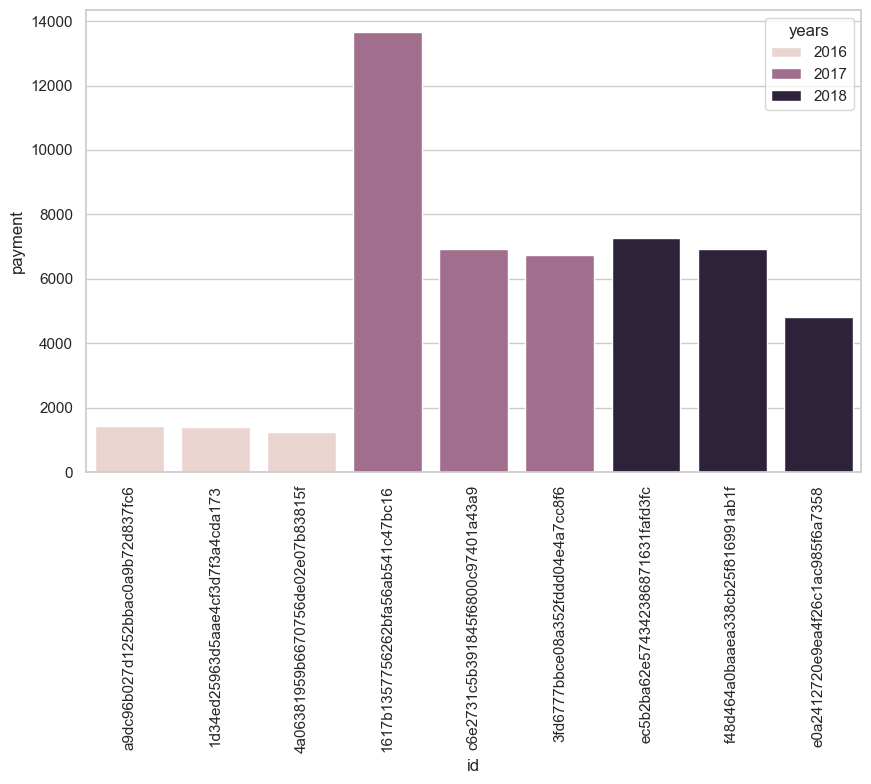

In [65]:
query = """ select years, customer_id, payment, d_rank from (select year(orders.order_purchase_timestamp) years, orders.customer_id, 
sum(payments.payment_value) payment, dense_rank() over(partition by year(orders.order_purchase_timestamp) order by sum(payments.payment_value) desc) 
d_rank from orders join payments on payments.order_id = orders.order_id group by year(orders.order_purchase_timestamp), orders.customer_id) 
as a where d_rank <= 3;  """

cur.execute(query)

data=cur.fetchall()
df = pd.DataFrame(data, columns =["years", "id", "payment", "rank"])
sns.barplot(x = "id", y= "payment", data = df, hue = "years")
plt.xticks(rotation = 90)
plt.show()

C:\Users\aatis\AppData\Local\Temp\ipykernel_6552\4130273457.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total Sales", y="City", data=df, palette="Blues_r")


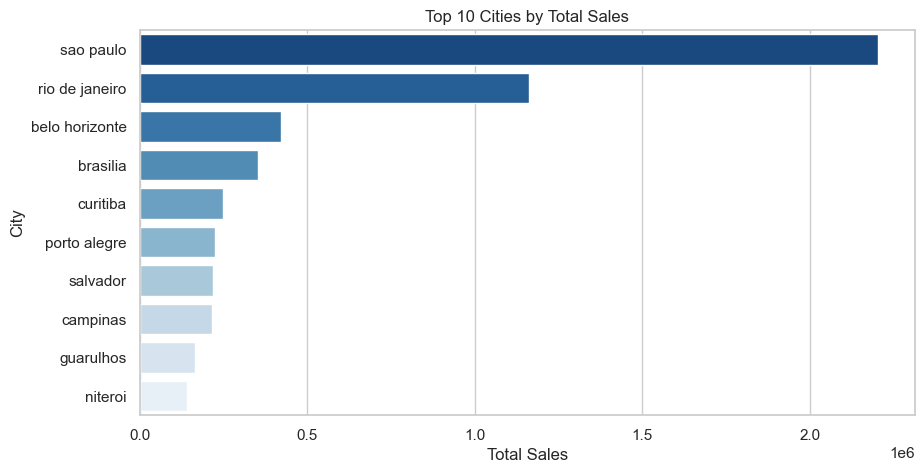

In [68]:
query = """
SELECT c.customer_city, ROUND(SUM(p.payment_value), 2) AS total_sales
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
JOIN payments p ON o.order_id = p.order_id
GROUP BY c.customer_city
ORDER BY total_sales DESC
LIMIT 10;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["City", "Total Sales"])

plt.figure(figsize=(10,5))
sns.barplot(x="Total Sales", y="City", data=df, palette="Blues_r")
plt.title("Top 10 Cities by Total Sales")
plt.show()


C:\Users\aatis\AppData\Local\Temp\ipykernel_6552\3707712903.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="State", y="Avg Delivery Days", data=df, palette="coolwarm")


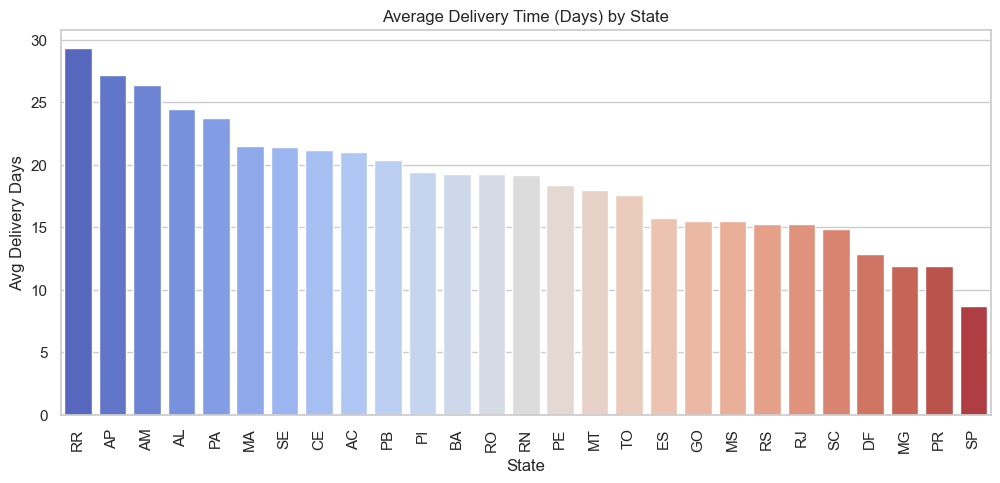

In [69]:
query = """
SELECT c.customer_state, 
       ROUND(AVG(DATEDIFF(o.order_delivered_customer_date, o.order_purchase_timestamp)), 2) AS avg_delivery_days
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
WHERE o.order_status = 'delivered'
GROUP BY c.customer_state
ORDER BY avg_delivery_days DESC;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["State", "Avg Delivery Days"])

plt.figure(figsize=(12,5))
sns.barplot(x="State", y="Avg Delivery Days", data=df, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Average Delivery Time (Days) by State")
plt.show()


C:\Users\aatis\AppData\Local\Temp\ipykernel_6552\1591367817.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Order Count", y="Category", data=df, palette="viridis")


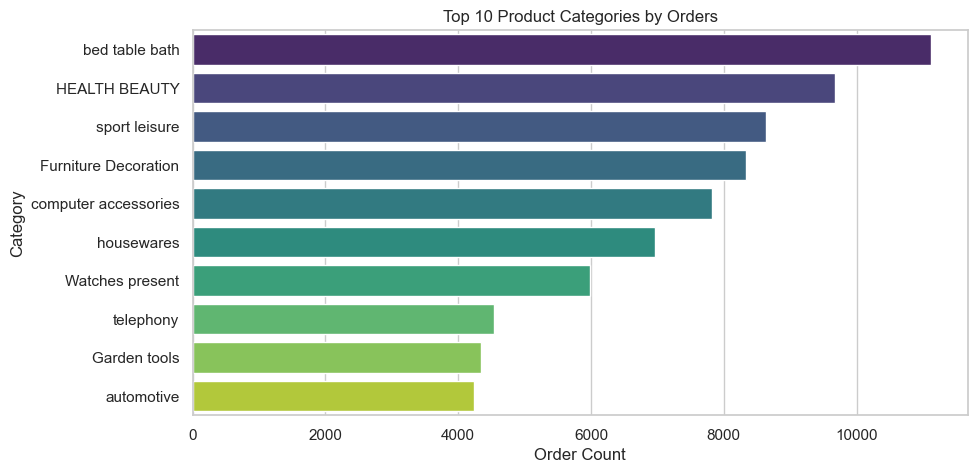

In [70]:
query = """
SELECT p.product_category_name, COUNT(oi.product_id) AS order_count
FROM order_items oi
JOIN products p ON oi.product_id = p.product_id
GROUP BY p.product_category_name
ORDER BY order_count DESC
LIMIT 10;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Category", "Order Count"])

plt.figure(figsize=(10,5))
sns.barplot(x="Order Count", y="Category", data=df, palette="viridis")
plt.title("Top 10 Product Categories by Orders")
plt.show()


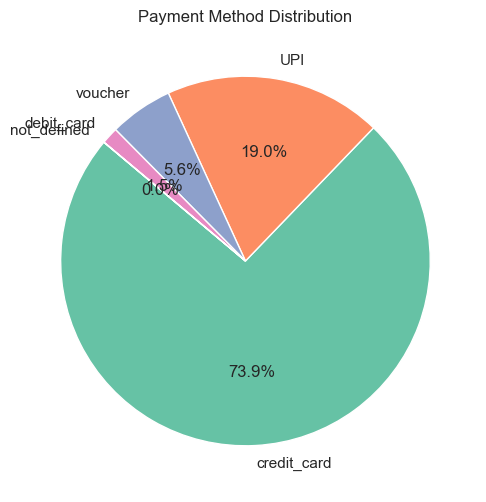

In [71]:
query = """
SELECT payment_type, COUNT(*) AS count
FROM payments
GROUP BY payment_type;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Payment Type", "Count"])

plt.figure(figsize=(6,6))
plt.pie(df["Count"], labels=df["Payment Type"], autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Set2"))
plt.title("Payment Method Distribution")
plt.show()


In [72]:
query = """
SELECT COUNT(*) AS repeat_customers
FROM (
    SELECT customer_id, COUNT(order_id) AS order_count
    FROM orders
    GROUP BY customer_id
    HAVING order_count > 1
) AS sub;
"""
cur.execute(query)
data = cur.fetchall()
print("Number of repeat customers:", data[0][0])


Number of repeat customers: 0


In [73]:
query = """
SELECT 
    o.customer_id,
    MAX(o.order_purchase_timestamp) AS last_purchase,
    COUNT(o.order_id) AS frequency,
    SUM(p.payment_value) AS monetary
FROM orders o
JOIN payments p ON o.order_id = p.order_id
GROUP BY o.customer_id;
"""
cur.execute(query)
data = cur.fetchall()
df = pd.DataFrame(data, columns=["Customer ID", "Last Purchase", "Frequency", "Monetary"])

# Convert dates
df["Last Purchase"] = pd.to_datetime(df["Last Purchase"])
df["Recency (Days)"] = (df["Last Purchase"].max() - df["Last Purchase"]).dt.days

display(df.head())


,Customer ID,Last Purchase,Frequency,Monetary,Recency (Days)
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,114.74,337
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,67.41,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,195.42,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,179.35,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,107.01,198


Project Conclusion – E-Commerce Analysis

Customer Insights

Majority of customers are concentrated in a few states/cities, highlighting potential regional demand hubs.

Customers from certain states show significantly higher purchasing frequency compared to others.

Order Behavior

Seasonal trends observed: 2017–2018 order volumes peak around mid-year and festive months.

Average number of items per order varies by city, showing differences in customer shopping patterns.

Sales & Revenue Analysis

Top product categories contribute disproportionately to overall sales, with electronics, home appliances, and furniture leading.

A small set of sellers dominate revenue, highlighting seller concentration risk.

Payment Insights

Installment-based payments form a notable portion of transactions, showing reliance on credit options.

Revenue has shown consistent year-on-year growth, with clear compounding trends in cumulative sales.

High-Value Customers

Top 3 customers per year contribute significantly more revenue than the average, confirming the Pareto Principle (80/20 rule) in action.

Business Growth

Year-on-year revenue growth percentages are positive, indicating healthy expansion.

Cumulative monthly sales trend highlights scalability and market adoption.

Strategic Recommendations

Focus marketing and logistics efforts on high-demand regions and states.

Diversify seller base to reduce dependency on a few high-performing sellers.

Promote installment schemes further since they drive higher purchase adoption.

Retain high-value customers with loyalty programs or targeted offers.